In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos
Leemos los dataframes con los resultados.

In [32]:

df_resultados_maximo_secuencial = pd.read_csv("../resultados/resultado_maximo_secuencial.csv");
df_resultados_maximo_concurrente = pd.read_csv("../resultados/resultado_maximo_concurrente.csv");
df_resultados_maximo = df_resultados_maximo_secuencial.append(df_resultados_maximo_concurrente, ignore_index = True);
df_resultados_maximo["n"] = df_resultados_maximo.apply(lambda column: 200*column)

df_resultados_cargarArchivo_secuencial = pd.read_csv("../resultados/resultado_cargarArchivo_secuencial.csv");
df_resultados_cargarArchivo_concurrente = pd.read_csv("../resultados/resultado_cargarArchivo_concurrente.csv");
df_resultados_cargarArchivo = df_resultados_cargarArchivo_secuencial.append(df_resultados_cargarArchivo_concurrente, ignore_index = True);




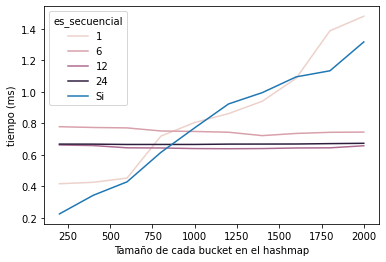

In [44]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_maximo_concurrente = df_resultados_maximo[((df_resultados_maximo['cantThreadsMaximo'] == 1) | (df_resultados_maximo['cantThreadsMaximo'] == 6) | (df_resultados_maximo['cantThreadsMaximo'] == 12) | (df_resultados_maximo['cantThreadsMaximo'] == 24)) & (df_resultados_maximo['es_secuencial'] == 'No')]
df_maximo_secuencial = df_resultados_maximo[(df_resultados_maximo['es_secuencial'] == 'Si')]
fig = sns.lineplot(data=df_maximo_concurrente, x='n', y='tiempo', hue='cantThreadsMaximo');
fig = sns.lineplot(data=df_maximo_secuencial, x='n', y='tiempo', hue='es_secuencial');
fig.set(xlabel='Tamaño de cada bucket en el hashmap', ylabel='tiempo (ms)');
#plt.savefig("../graficos/tiempo-heuristicas.svg");

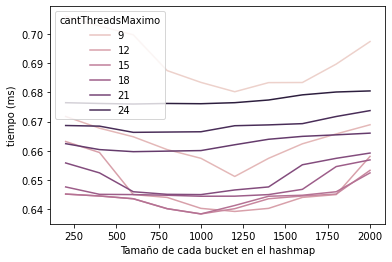

In [40]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_maximo_2 = df_resultados_maximo[((df_resultados_maximo['cantThreadsMaximo'] %2 == 0) & (df_resultados_maximo['es_secuencial'] == 'No') & (df_resultados_maximo['cantThreadsMaximo'] > 6))]
fig = sns.lineplot(data=df_maximo_2, x='n', y='tiempo', hue='cantThreadsMaximo');
fig.set(xlabel='Tamaño de cada bucket en el hashmap', ylabel='tiempo (ms)');
#plt.savefig("../graficos/tiempo-heuristicas.svg");

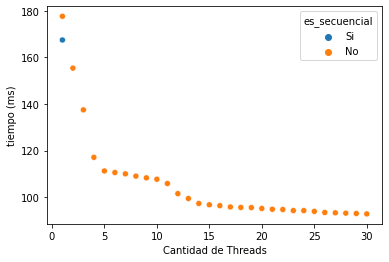

In [17]:
# Graficamos los gaps de ejecución de cada dataset en función de n.
fig = sns.scatterplot(data=df_resultados_cargarArchivo, x='cantThreadsLectura', y='tiempo', hue = 'es_secuencial');
fig.set(xlabel='Cantidad de Threads', ylabel='tiempo (ms)');
#plt.savefig("../graficos/calidad-heuristicas.svg");